# Chapter 2: Mortality

In [2]:
import pandas as pd  # Import libraries, and rename as pd

## Get the data

In [3]:
#  Define the URL for mortality data
mortality_url = "https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD"
mortality_data = pd.read_csv(mortality_url) # Load the mortality data from the URL into a DataFrame

### Save and restore the DataFrame

In [4]:
# Save the DataFrame to a pickle file
mortality_data.to_pickle('mortality_data.pkl')

In [5]:
mortality_data = pd.read_pickle('mortality_data.pkl')

## Examine and clean the data

### Display the data

In [6]:
mortality_data  #Display the mortality dataframe

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [7]:
mortality_data.head() # show the first 5 row

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [8]:
mortality_data.tail(3) #show the last 3 row

,Year,Age Group,Death Rate
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


In [15]:
display(mortality_data)

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


In [13]:
# Display 5 rows and show all columns
with pd.option_context(
    'display.max_rows', 5,
    'display.max_columns', None):
    display(mortality_data)  

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
...,...,...,...
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


### Display the DataFrame attributes

In [16]:
mortality_data.values 

array([[1900, '1-4 Years', 1983.8],
       [1901, '1-4 Years', 1695.0],
       [1902, '1-4 Years', 1655.7],
       ...,
       [2016, '15-19 Years', 51.2],
       [2017, '15-19 Years', 51.5],
       [2018, '15-19 Years', 49.2]], dtype=object)

In [19]:
print("Index:  ", mortality_data.index) # Display the index of the DataFrame
print("Columns:", mortality_data.columns) # Display column names
print("Size:   ", mortality_data.size) # Display total number of elements
print("Shape:  ", mortality_data.shape) # Display the dimensions (rows, columns)

Index:   RangeIndex(start=0, stop=476, step=1)
Columns: Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')
Size:    1428
Shape:   (476, 3)


### Use the columns attribute to change the column names

In [20]:
# Remove spaces from column names with the space
mortality_data.columns = mortality_data.columns.str.replace(" ", "")

In [21]:
print(mortality_data.columns) # print renewed column names 

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')


In [22]:
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


### Use the info(), nunique(), and describe() methods

In [23]:
# Display DataFrame information
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [24]:
# Display DataFrame info with detailed memory usage
mortality_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       476 non-null    int64  
 1   AgeGroup   476 non-null    object 
 2   DeathRate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.7 KB


In [25]:
# Count the number of unique values in each column
mortality_data.nunique()

Year         119
AgeGroup       4
DeathRate    430
dtype: int64

In [26]:
# summary statistics for "numerical" columns (AgeGroup isn't numerical column)
mortality_data.describe()

,Year,DeathRate
count,476.000000,476.000000
mean,1959.000000,192.924160
std,34.387268,293.224216
min,1900.000000,11.400000
25%,1929.000000,40.575000
50%,1959.000000,89.500000
75%,1989.000000,222.575000
max,2018.000000,1983.800000


In [27]:
# .T makes the column names become row labels
# for better readability
mortality_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,476.0,1959.00000,34.387268,1900.0,1929.000,1959.0,1989.000,2018.0
DeathRate,476.0,192.92416,293.224216,11.4,40.575,89.5,222.575,1983.8


### Save and restore the cleaned DataFrame

In [30]:
mortality_data.to_pickle('mortality_cleaned.pkl')

In [31]:
mortality_data = pd.read_pickle('mortality_cleaned.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


## Access the data

### How to access columns

In [33]:
mortality_data.DeathRate.head(2)# show first 2 DeathRate info

0    1983.8
1    1695.0
Name: DeathRate, dtype: float64

In [35]:
type(mortality_data.DeathRate)  
#A Series is a "column" 
# A DataFrame is a "table" that contains multiple rows and columns.

pandas.core.series.Series

In [36]:
#[] is used to access data in DataFrame or Series
mortality_data['DeathRate'].head(2)

0    1983.8
1    1695.0
Name: DeathRate, dtype: float64

In [37]:
#Select a single column (returns a Series)
type(mortality_data['DeathRate'])

pandas.core.series.Series

In [38]:
mortality_data[['Year','DeathRate']].head(2)

,Year,DeathRate
0,1900,1983.8
1,1901,1695.0


In [39]:
# Select multiple fields (return DataFrame)
type(mortality_data[['Year','DeathRate']])

pandas.core.frame.DataFrame

### How to access rows

In [40]:
# .query() =>filter data 
mortality_data.query('Year==1900')

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
119,1900,5-9 Years,466.1
238,1900,10-14 Years,298.3
357,1900,15-19 Years,484.8


In [41]:
mortality_data.query('Year == 2000 and AgeGroup != "1-4 Years"')

,Year,AgeGroup,DeathRate
219,2000,5-9 Years,15.8
338,2000,10-14 Years,20.3
457,2000,15-19 Years,67.1


In [42]:
mortality_data.query('Year == 1900 or Year == 2000').head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
100,2000,1-4 Years,32.4
119,1900,5-9 Years,466.1
219,2000,5-9 Years,15.8
238,1900,10-14 Years,298.3


In [46]:
# use backticks if a column name contains spaces
# mortality_data.query('Year == 2000 and `Age Group` != "1-4 Years"')

### How to access a subset of rows and columns

In [48]:
#Query the first 5 mortality rates for Year == 1900
mortality_data.query('Year == 1900').DeathRate.head()

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [53]:
#Query the first 5 mortality rates for Year == 1900
# return type =>series
mortality_data.query('Year == 1900')['DeathRate'].head()

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [56]:
#Query the first 5 mortality rates for Year == 1900
# return type =>dataframe
mortality_data.query('Year == 1900')[['DeathRate']].head()

,DeathRate
0,1983.8
119,466.1
238,298.3
357,484.8


In [57]:
mortality_data.query('Year == 1900')[['AgeGroup','DeathRate']].head()

,AgeGroup,DeathRate
0,1-4 Years,1983.8
119,5-9 Years,466.1
238,10-14 Years,298.3
357,15-19 Years,484.8


### How to access rows with the loc[] accessor

In [61]:
# Select the rows with index = 0, 5, and 10, and return a DataFrame
mortality_data.loc[[0,5,10]]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3


In [68]:
# Select the rows with index 4~6(included), and return a DataFrame
mortality_data.loc[4:6]

,Year,AgeGroup,DeathRate
4,1904,1-4 Years,1591.5
5,1905,1-4 Years,1498.9
6,1906,1-4 Years,1580.0


In [69]:
# Select the rows with index = 0, 5, 10, 15, 20, and return a DataFrame
mortality_data.loc[0:20:5]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3
15,1915,1-4 Years,924.2
20,1920,1-4 Years,987.2


In [70]:
# Select the rows with Year == 1917, and return a DataFrame
mortality_data.loc[mortality_data.Year == 1917]

,Year,AgeGroup,DeathRate
17,1917,1-4 Years,1066.0
136,1917,5-9 Years,290.7
255,1917,10-14 Years,218.9
374,1917,15-19 Years,380.3


### How to access columns with the loc[] accessor

In [71]:
# return DataFrame containing "all rows" of Year and AgeGroup columns.
mortality_data.loc[:, ['Year', 'AgeGroup']]

,Year,AgeGroup
0,1900,1-4 Years
1,1901,1-4 Years
2,1902,1-4 Years
3,1903,1-4 Years
4,1904,1-4 Years
...,...,...
471,2014,15-19 Years
472,2015,15-19 Years
473,2016,15-19 Years
474,2017,15-19 Years


### How to access a subset of rows and columns with the loc[] accessor

In [72]:
# Select the data of AgeGroup and DeathRate columns at index 0, 5, and 10.
mortality_data.loc[[0,5,10],['AgeGroup','DeathRate']]

,AgeGroup,DeathRate
0,1-4 Years,1983.8
5,1-4 Years,1498.9
10,1-4 Years,1397.3


In [76]:
# Select the data of AgeGroup and DeathRate columns at index 4~6.
mortality_data.loc[4:6,'AgeGroup':'DeathRate']

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


### How to access rows with the iloc[] accessor

In [74]:
# select at index 0, 5, and 10
mortality_data.iloc[[0,5,10]]

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3


In [80]:
mortality_data.iloc[4:6]   # index 6 isn't included
# mortality_data.iloc[4:6,[1,2]]

,Year,AgeGroup,DeathRate
4,1904,1-4 Years,1591.5
5,1905,1-4 Years,1498.9


In [81]:
mortality_data.iloc[0:20:5]  # index 20 isn't included

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
5,1905,1-4 Years,1498.9
10,1910,1-4 Years,1397.3
15,1915,1-4 Years,924.2


### How to access a subset of rows and columns with the iloc[] accessor

In [83]:
# Select the data of AgeGroup and DeathRate columns at index 0, 5, and 10.
mortality_data.iloc[[0,5,10],[1,2]]

,AgeGroup,DeathRate
0,1-4 Years,1983.8
5,1-4 Years,1498.9
10,1-4 Years,1397.3


In [85]:
# row => 4 ,5 and 6 (7 isn't included)
# column => 1 and 2 (3 isn't included)
mortality_data.iloc[4:7,1:3]

,AgeGroup,DeathRate
4,1-4 Years,1591.5
5,1-4 Years,1498.9
6,1-4 Years,1580.0


In [86]:
# Select the last 10 rows
mortality_data.iloc[-10:]  

,Year,AgeGroup,DeathRate
466,2009,15-19 Years,51.9
467,2010,15-19 Years,49.4
468,2011,15-19 Years,48.9
469,2012,15-19 Years,47.2
470,2013,15-19 Years,44.8
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5
475,2018,15-19 Years,49.2


## Prepare the data

### Sort the data

In [87]:
# Sort by DeathRate in descending order (largest to smallest)
mortality_data.sort_values('DeathRate', ascending=False).head(3)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7


In [88]:
# Sort by Year first. If Year is the same, sort by DeathRate.
# Default: Sort by ascending order (small to large)
mortality_data.sort_values(['Year','DeathRate']).head(3)

,Year,AgeGroup,DeathRate
238,1900,10-14 Years,298.3
119,1900,5-9 Years,466.1
357,1900,15-19 Years,484.8


In [89]:
#sort by Year first (ascending). If Year is the same, sort by DeathRate. (descending)
mortality_data.sort_values(['Year','DeathRate'],
                           ascending=[True,False]).head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
357,1900,15-19 Years,484.8
119,1900,5-9 Years,466.1
238,1900,10-14 Years,298.3
1,1901,1-4 Years,1695.0


In [90]:
#sort by DeathRate first (descending). If DeathRate is the same, sort by Year (ascending).
mortality_data.sort_values(['DeathRate','Year'],
                           ascending=[False,True]).head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
4,1904,1-4 Years,1591.5
6,1906,1-4 Years,1580.0


### Apply statistical methods

In [91]:
# calculate the mean of DeathRate
mortality_data.DeathRate.mean()

192.92415966386554

In [92]:
#Displays the maximum values of AgeGroup and DeathRate columns respectively.
mortality_data[['AgeGroup','DeathRate']].max()

AgeGroup     5-9 Years
DeathRate       1983.8
dtype: object

In [96]:
# Count the number of non-NaN and non-None data in each column.
mortality_data.count()

Year         476
AgeGroup     476
DeathRate    476
dtype: int64

In [98]:
# mortality_data.quantile([.1,.9]) = TypeError (reason: Cannot calculate non-numeric fields)
mortality_data.select_dtypes(include='number').quantile([.1, .9]) # Ensure that only numeric fields are calculated

,Year,DeathRate
0.1,1911.5,21.50
0.9,2006.5,430.85


In [99]:
#cumsum() is used to calculate the "cumulative sum"
#add up the values of the DeathRate column starting from the first row
mortality_data['DeathRate'].cumsum()

0       1983.8
1       3678.8
2       5334.5
3       6876.6
4       8468.1
        ...   
471    91631.7
472    91680.0
473    91731.2
474    91782.7
475    91831.9
Name: DeathRate, Length: 476, dtype: float64

### Use Python for column arithmetic

In [102]:
#add a column named MeanCentered to a DataFrame
# MeanCentered save the value of "DeathRate - DeathRate mean"
mortality_data['MeanCentered'] = \
    mortality_data.DeathRate - mortality_data.DeathRate.mean()

In [101]:
mortality_data

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,1-4 Years,1983.8,1790.87584
1,1901,1-4 Years,1695.0,1502.07584
2,1902,1-4 Years,1655.7,1462.77584
3,1903,1-4 Years,1542.1,1349.17584
4,1904,1-4 Years,1591.5,1398.57584
...,...,...,...,...
471,2014,15-19 Years,45.5,-147.42416
472,2015,15-19 Years,48.3,-144.62416
473,2016,15-19 Years,51.2,-141.72416
474,2017,15-19 Years,51.5,-141.42416


In [103]:
mortality_data['DeathRate'] = mortality_data.DeathRate / 100000

In [104]:
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,1-4 Years,0.019838,1790.87584
1,1901,1-4 Years,0.016950,1502.07584
2,1902,1-4 Years,0.016557,1462.77584
3,1903,1-4 Years,0.015421,1349.17584
4,1904,1-4 Years,0.015915,1398.57584


### Modify the string data in a column

In [110]:
#"1-4 Years" → "01-04 Years"
#"5-9 Years" → "05-09 Years"
# inplace=True will modify mortality_data directly without reassigning it.
mortality_data.AgeGroup.replace(
    {'1-4 Years':'01-04 Years','5-9 Years':'05-09 Years'},
    inplace = True)
mortality_data

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584
2,1902,01-04 Years,0.016557,1462.77584
3,1903,01-04 Years,0.015421,1349.17584
4,1904,01-04 Years,0.015915,1398.57584
...,...,...,...,...
471,2014,15-19 Years,0.000455,-147.42416
472,2015,15-19 Years,0.000483,-144.62416
473,2016,15-19 Years,0.000512,-141.72416
474,2017,15-19 Years,0.000515,-141.42416


In [112]:
mortality_data.AgeGroup.replace(
    to_replace = ['1-4 Years','5-9 Years'],
    value = ['01-04 Years','05-09 Years'],
    inplace = True)
mortality_data

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584
2,1902,01-04 Years,0.016557,1462.77584
3,1903,01-04 Years,0.015421,1349.17584
4,1904,01-04 Years,0.015915,1398.57584
...,...,...,...,...
471,2014,15-19 Years,0.000455,-147.42416
472,2015,15-19 Years,0.000483,-144.62416
473,2016,15-19 Years,0.000512,-141.72416
474,2017,15-19 Years,0.000515,-141.42416


In [ ]:
# mortality_data['AgeGroup'] = mortality_data.AgeGroup.str.replace('1-4 Years','01-04 Years')
# mortality_data['AgeGroup'] = mortality_data.AgeGroup.str.replace('5-9 Years','05-09 Years')

In [113]:
mortality_data

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584
2,1902,01-04 Years,0.016557,1462.77584
3,1903,01-04 Years,0.015421,1349.17584
4,1904,01-04 Years,0.015915,1398.57584
...,...,...,...,...
471,2014,15-19 Years,0.000455,-147.42416
472,2015,15-19 Years,0.000483,-144.62416
473,2016,15-19 Years,0.000512,-141.72416
474,2017,15-19 Years,0.000515,-141.42416


### Save and restore the prepared DataFrame

In [114]:
#Save the mortality_data DataFrame in .pkl format and name it mortality_prepped.pkl.
mortality_data.to_pickle('mortality_prepped.pkl')

In [117]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584
2,1902,01-04 Years,0.016557,1462.77584
3,1903,01-04 Years,0.015421,1349.17584
4,1904,01-04 Years,0.015915,1398.57584


## Shape the data

### Set and use an index

In [118]:
mortality_data.head(2)

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584


In [119]:
# Set the Year column as the index of the DataFrame
mortality_data = mortality_data.set_index('Year')
mortality_data.head(2)

,AgeGroup,DeathRate,MeanCentered
Year,,,
1900,01-04 Years,0.019838,1790.87584
1901,01-04 Years,0.016950,1502.07584


In [124]:
#reset index
mortality_data.reset_index(inplace=True)

In [125]:
# Set Year column and AgeGroup column as the index
mortality_data = mortality_data.set_index(
    ['Year','AgeGroup'],verify_integrity=True)
mortality_data.head(2)

,,index,DeathRate,MeanCentered
Year,AgeGroup,,,
1900,01-04 Years,0,0.019838,1790.87584
1901,01-04 Years,1,0.016950,1502.07584


In [126]:
#reset index
mortality_data.reset_index(inplace=True)

In [127]:
mortality_data.head(2)

,Year,AgeGroup,index,DeathRate,MeanCentered
0,1900,01-04 Years,0,0.019838,1790.87584
1,1901,01-04 Years,1,0.016950,1502.07584


### Pivot the data

In [128]:
# long format -> wide format
# Set Year as the index
# Convert AgeGroup to column name
mortality_wide = mortality_data.pivot(
    index="Year",columns="AgeGroup")
mortality_wide.head(3)

index                                       DeathRate  \
AgeGroup 01-04 Years 05-09 Years 10-14 Years 15-19 Years 01-04 Years   
Year                                                                   
1900               0         119         238         357    0.019838   
1901               1         120         239         358    0.016950   
1902               2         121         240         359    0.016557   

                                             MeanCentered              \
AgeGroup 05-09 Years 10-14 Years 15-19 Years  01-04 Years 05-09 Years   
Year                                                                    
1900        0.004661    0.002983    0.004848   1790.87584   273.17584   
1901        0.004276    0.002736    0.004544   1502.07584   234.67584   
1902        0.004033    0.002525    0.004215   1462.77584   210.37584   

                                  
AgeGroup 10-14 Years 15-19 Years  
Year                              
1900       105.37584   291.87584  
1901        80.67584   261.47584  
1902        59.57584   228.57584

In [129]:
# only show value of DeathRate 
mortality_wide = mortality_data.pivot(
    index="Year",columns="AgeGroup",values="DeathRate")
mortality_wide.head(3)

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,0.019838,0.004661,0.002983,0.004848
1901,0.016950,0.004276,0.002736,0.004544
1902,0.016557,0.004033,0.002525,0.004215


### Melt the data

In [130]:
mortality_wide.to_excel('mortality_wide.xlsx')

In [131]:
mortality_wide = pd.read_excel('mortality_wide.xlsx')
mortality_wide.head(4)

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341


In [132]:
# melt() => wide format -> long format
mortality_long = mortality_wide.melt(
    id_vars = 'Year',
    value_vars=['01-04 Years','05-09 Years'],
    var_name ='AgeGroup',
    value_name='DeathRate')
mortality_long.head(4)
with pd.option_context('display.max_rows', 4):
    display(mortality_long)

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,0.019838
1,1901,01-04 Years,0.016950
...,...,...,...
236,2017,05-09 Years,0.000116
237,2018,05-09 Years,0.000115


### Save and restore the wide DataFrame

In [133]:
mortality_wide.to_pickle('mortality_wide.pkl')

In [134]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714


## Analyze the data

### Group the data

In [135]:
mortality_data.head()

,Year,AgeGroup,index,DeathRate,MeanCentered
0,1900,01-04 Years,0,0.019838,1790.87584
1,1901,01-04 Years,1,0.016950,1502.07584
2,1902,01-04 Years,2,0.016557,1462.77584
3,1903,01-04 Years,3,0.015421,1349.17584
4,1904,01-04 Years,4,0.015915,1398.57584


In [138]:
# Group by AgeGroup and aggregate the data of the same AgeGroup together
mortality_data.groupby('AgeGroup').mean()

,Year,index,DeathRate,MeanCentered
AgeGroup,,,,
01-04 Years,1959.0,59.0,0.003832,190.301891
05-09 Years,1959.0,178.0,0.001173,-75.598109
10-14 Years,1959.0,297.0,0.000938,-99.154412
15-19 Years,1959.0,416.0,0.001774,-15.549370


In [139]:
#Contains non-numeric fields (such as AgeGroup), which prevents .median() from being calculated.
mortality_data.groupby('Year').median().head(4)

TypeError: agg function failed [how->median,dtype->object]

In [142]:
mortality_data.groupby(['Year','AgeGroup']).count().head()

index  DeathRate  MeanCentered
Year AgeGroup                                   
1900 01-04 Years      1          1             1
     05-09 Years      1          1             1
     10-14 Years      1          1             1
     15-19 Years      1          1             1
1901 01-04 Years      1          1             1

In [143]:
# Group by AgeGroup.
# Calculate summary statistics for the DeathRate column
mortality_data.groupby('AgeGroup')['DeathRate'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
01-04 Years,119.0,0.003832,0.005005,0.000240,0.000507,0.001091,0.005773,0.019838
05-09 Years,119.0,0.001173,0.001275,0.000114,0.000240,0.000484,0.001989,0.004661
10-14 Years,119.0,0.000938,0.000884,0.000139,0.000272,0.000446,0.001589,0.003751
15-19 Years,119.0,0.001774,0.001384,0.000448,0.000855,0.001069,0.002837,0.007774


### Aggregate the data

In [144]:
# .agg() => allow apply different functions to multiple columns at once
mortality_data.groupby('AgeGroup').agg(['mean','median'])

Year          index        DeathRate           MeanCentered  \
               mean  median   mean median      mean    median         mean   
AgeGroup                                                                     
01-04 Years  1959.0  1959.0   59.0   59.0  0.003832  0.001091   190.301891   
05-09 Years  1959.0  1959.0  178.0  178.0  0.001173  0.000484   -75.598109   
10-14 Years  1959.0  1959.0  297.0  297.0  0.000938  0.000446   -99.154412   
15-19 Years  1959.0  1959.0  416.0  416.0  0.001774  0.001069   -15.549370   

                        
                median  
AgeGroup                
01-04 Years  -83.82416  
05-09 Years -144.52416  
10-14 Years -148.32416  
15-19 Years  -86.02416

In [145]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
01-04 Years,0.003832,0.001091,0.005005,117
05-09 Years,0.001173,0.000484,0.001275,115
10-14 Years,0.000938,0.000446,0.000884,115
15-19 Years,0.001774,0.001069,0.001384,117


In [146]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std','min','max','var','nunique'])

,mean,median,std,min,max,var,nunique
Year,,,,,,,
1900,0.008082,0.004755,0.007882,0.002983,0.019838,6.212178e-05,4
1901,0.007127,0.004410,0.006597,0.002736,0.016950,4.352410e-05,4
1902,0.006833,0.004124,0.006527,0.002525,0.016557,4.260299e-05,4
1903,0.006648,0.004244,0.005896,0.002682,0.015421,3.475731e-05,4
1904,0.006983,0.004482,0.005996,0.003052,0.015915,3.595034e-05,4
...,...,...,...,...,...,...,...
2014,0.000237,0.000190,0.000155,0.000115,0.000455,2.394167e-08,4
2015,0.000249,0.000197,0.000166,0.000117,0.000483,2.759625e-08,4
2016,0.000258,0.000200,0.000178,0.000122,0.000512,3.186025e-08,4


## Visualize the data

<Axes: xlabel='Year'>

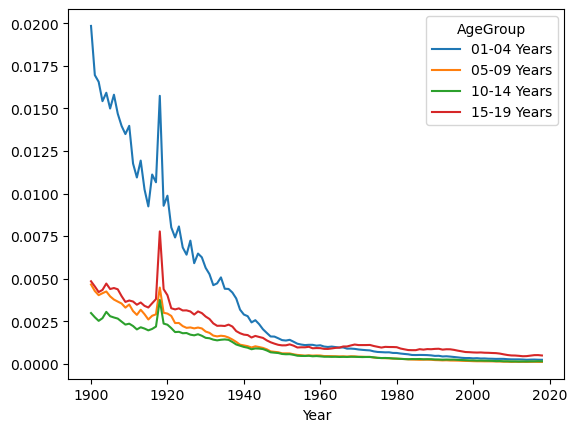

In [148]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

<Axes: ylabel='AgeGroup'>

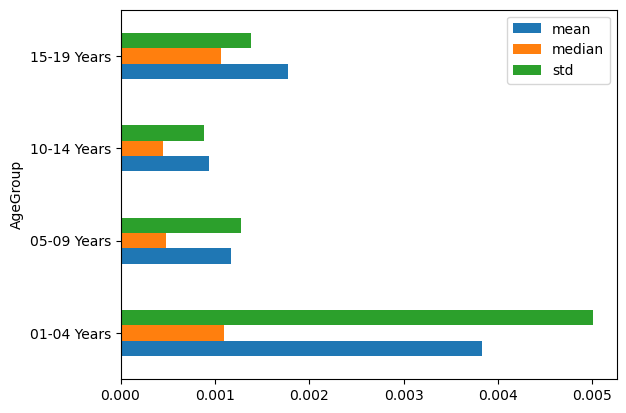

In [149]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std']).plot.barh()

## Did you use a language model?

### Ans: Yes, it helps me explain code and errors. I will paste a screenshot of the error message and ask how to fix it.

## What did you do to verify that your code worked as expected?

### Ans: Run it and see if there is an error.